In [1]:
import praw

In [2]:
import pickle

In [2]:
import time
import datetime
import os 

In [3]:
# change dir to data 
os.chdir('../data')

In [4]:
reddit = praw.Reddit(client_id='qJwY2ZzRahm-GQ',
                     client_secret='lkZjzt2g6MutrTm3D7c7hNl5R6w',
                     user_agent='linux:reddit-analysis:v1.0.0 (by /u/DigitalArcheology)',
                     username='DigitalArcheology',
                     password='GOvols!2017')

In [2]:
sub = reddit.subreddit('worldnews')

In [17]:
timestamp_01Jan = time.mktime(datetime.date(2017, 1, 1).timetuple())
timestemp_31Jan = time.mktime(datetime.date(2017, 1, 31).timetuple())

In [18]:
submissions = []
for submission in sub.submissions(start=timestamp_01Jan, end=timestemp_31Jan):
    submissions.append(submission)

In [29]:
print(len(submissions))

6206


In [45]:
with open('Jan2017worldnews', 'wb') as f:
    pickle.dump(file=f, obj=submissions)

In [5]:
with open('Jan2017worldnews', 'rb') as f:
    submissions = pickle.load(f)

In [6]:
def get_comments(submission):
    flat_comment = ''
    submission.comments.replace_more(limit=0)
    for comment in submission.comments.list():
        if not comment.body == '[deleted]':
            flat_comment += comment.body + ' '
    return flat_comment

In [29]:
def clean_flat_comments(document):
    document = document.encode(encoding='ascii', errors='ignore').decode('ascii')
    document = document.replace('\n', ' ')
    document = document.replace('\t', ' ')
    return document

In [ ]:
cc = clean_flat_comments
with open('Jan2017worldnews_flatcomments.txt', 'w') as f:
    for i, submission in enumerate(submissions):
        if submission.num_comments > 100:
            document = get_comments(submission=submission)
            document = cc(document)
            f.write(submission.id + '\t' + document + '\n')
        if i % 100 == 0:
            print(i, end=', ')

0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 

In [34]:
!wc -l Jan2017worldnews_flatcomments.txt

604 Jan2017worldnews_flatcomments.txt


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from scripts import themeExtraction

In [16]:
model = themeExtraction.redditNMF('worldnews', 2017, 1, 2017, 1)

Extracting tf-idf features for NMF... done in 4.722s.
Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=623 and n_features=1000... done in 1.272s.


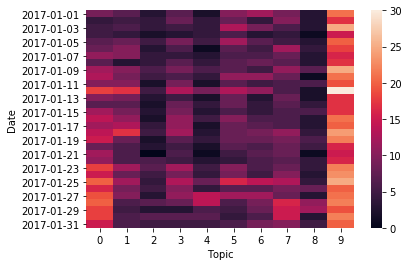

In [17]:
model.heatmap()